<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2024 </h4>
    <hr>
    <h1> Homework 4: Logistic Regression</h1>
    <h3></h3>
</center>

## Description

<font face="Times New Roman">Students need to implement the Logistic Regression algorithm, and visualize the decision decision.</font>

### 1.1 Data processing

In [29]:
# Load Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [30]:
# Load raw data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [31]:
# Display part of raw data
# data.head(10)
print(df.head(10))  # Display the first 10 rows of DataFrame

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [32]:
X = df.drop('target', axis=1)
y = df['target']

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [35]:
# Apply PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### 1.2 Model training and prediction

In [36]:
# Build a Logistic Regression model and fit the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [37]:
from sklearn.metrics import f1_score
# Prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'模型准确率：{accuracy:.2f}')
print(f'f1 score:{f1_score(y_test,y_pred,average='macro')}')

模型准确率：0.89
f1 score:0.8877665544332212


### 1.3 Performance metrics

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report: ")
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



precision：精确率，表示预测为正例的样本中真正为正例的比例。精确率越高，说明模型预测为正例的样本中，真正为正例的样本越多。

recall：召回率，表示真正为正例的样本中被预测为正例的比例。召回率越高，说明模型找出了越多的真正正例。

f1-score：F1分数，是精确率和召回率的调和平均数。F1分数越高，说明模型在精确率和召回率之间取得了更好的平衡。

support：支持数，即该类别的样本数。

## 3 Visualizing results

### 3.1 Confusion Matrix

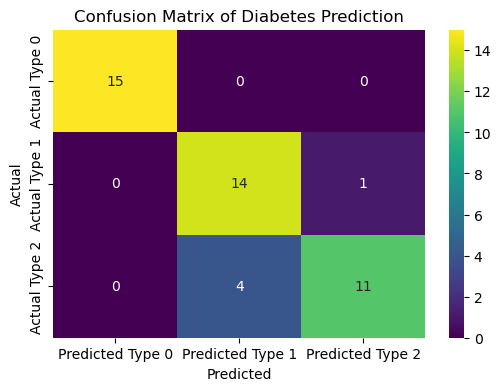

In [39]:
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test,y_pred)

# 创建一个 DataFrame，用于绘制热力图
cm_df = pd.DataFrame(cm, index=['Actual Type 0', 'Actual Type 1','Actual Type 2'],
                     columns=['Predicted Type 0', 'Predicted Type 1','Predicted Type 2'])

# 绘制混淆矩阵的热力图
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix of Diabetes Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.2 Decision boundary

In [40]:
# Generate a mesh grid to plot the decision boundary
X_scaled = X_train
y = y_train
X_scaled = pca.fit_transform(X_scaled)
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5,X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

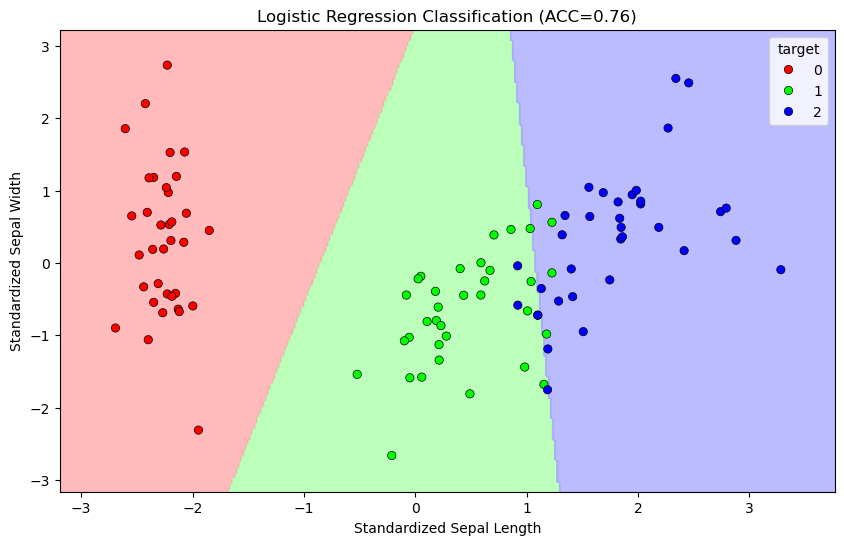

In [41]:
# Plot the decision boundary and the data points
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
sns.scatterplot(
        x=X_scaled[:, 0], y=X_scaled[:, 1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0, edgecolor="black"
    )
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title('Logistic Regression Classification (ACC=0.76)')
plt.show()

In [42]:
print('The weight coefficient is: ' + str(model.coef_))
print('The bias coefficient is: ' + str(model.intercept_))


The weight coefficient is: [[-2.63984213  0.36938685]
 [-0.13675133 -0.28489555]
 [ 2.77659346 -0.0844913 ]]
The bias coefficient is: [-0.37809925  1.76058933 -1.38249008]
